<a href="https://colab.research.google.com/github/PosgradoMNA/ActividadesAprendizaje-A01794419-IgnacioQuintero/blob/main/Module4_Data_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis with Python
## Module 4 - Model Development

* Alumno: Ignacio Antonio Quintero Chávez.
* Matrícula: A01794419.
* Materia: Ciencia y analítica de datos.
* Profesora: María de la Paz Rico Fernández.
* Fecha: 1 Noviembre 2022.

A model or estimator can be thought of as a mathematical equation used to predict a value given one or more other values.

Usually, the more relevant data you have, the more accurate your model is.

**Linear regression:** It will refer to one independent variable to make a prediction.

**Multiple linear regression:** It will refer to multiple independent variables to make a prediction.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset and save it to a variable
dataset = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [3]:
# Storing the dataset into a dataframe
dataframe = pd.read_csv(dataset)
dataframe

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


### Linear Regression and Multiple Linear Regression

**Simple Linear Regression**

It is a method to help us understand the relationship between two variables.

* The predictor/independent variable (X).
* The response/dependent variable (that we want to predict) (Y).

The result of linear regression is a **linear function** that predicts the response (dependent) variable as a function of the predictor (independent) variable.

*Y: Response Variable*

*X: Predictor Variables*

**Linear Function**

*Yhat = a + bX*


* a = It refers to the intercept of the regression line, or, the value of Y when X is 0.

* b = It refers to the slope of the regression line, or, the value with which Y changes when X increases by 1 unit.

In [4]:
# Importing the module for linear regression
from sklearn.linear_model import LinearRegression

In [5]:
# Create the linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [6]:
# Create a linear function with 'highway-mpg' as the predictor variable
X = dataframe[["highway-mpg"]]

# Create a linear function with 'price' as the response variable
Y = dataframe[["price"]]

In [7]:
# Fit the linear model using highway-mpg
lm.fit(X, Y)

LinearRegression()

In [8]:
# We can output a prediction
Yhat = lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

What is the value of the incercept (a)?

In [9]:
lm.intercept_

array([38423.30585816])

What is the value of the slope (b)?

In [10]:
lm.coef_

array([[-821.73337832]])

**Multiple Linear Regression**

This method is used to explain the relationship between one continuos response (dependent) variable and two more predictor (independent) variables.

*Y: Response Variable*
* X_1: *Predictor Variable 1*
* X_2: *Predictor Variable 2*
* X_3: *Predictor Variable 3*
* X_4: *Predictor Variable 4*


a: *intercept*
* b_1: *coefficients of Variable 1*
* b_2: *coefficients of Variable 2*
* b_3: *coefficients of Variable 3*
* b_4: *coefficients of Variable 4*

The equation is given by:

*Yhat* = a + b_1X_1 + b_2X_2 + b_3X_3 + b_4_X_4

In [11]:
# Developing a model using some variables as the predictor variables
Z = dataframe[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]

In [12]:
# Fit the linear model using the four above-mentioned variables
lm.fit(Z, dataframe["price"])

LinearRegression()

What is the value of the intercept(a)?

In [13]:
lm.intercept_

-15806.62462632922

What is the value of the coefficients (b1, b2, b3, b4)?

In [14]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

### Model Evaluation Using Visualization

In [15]:
# Importing the visualization package, seaborn
import seaborn as sns
%matplotlib inline

**Regression Plot**

(0.0, 48175.48493205674)

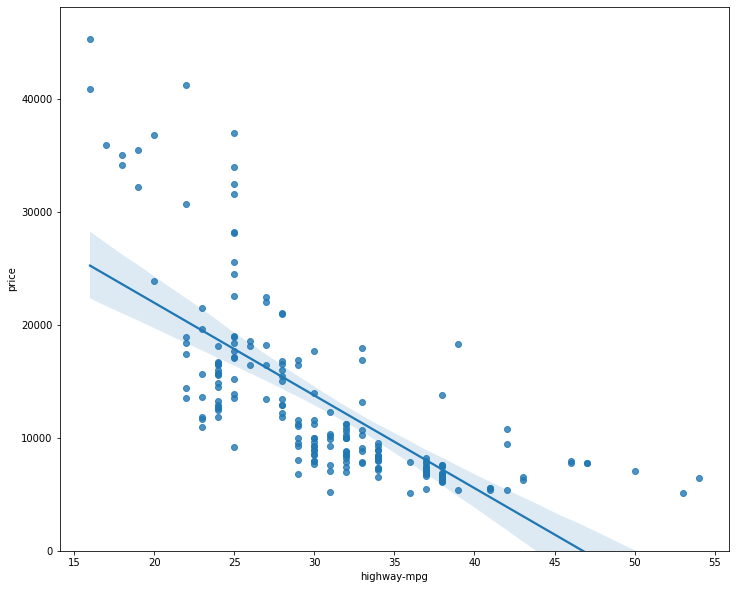

In [16]:
width = 12
height = 10
plt.figure(figsize=(width, height))
# x and y are the input variables
# data equals the dataframe
sns.regplot(x="highway-mpg", y="price", data=dataframe)
# Control y limits
plt.ylim(0, )

(0.0, 47414.1)

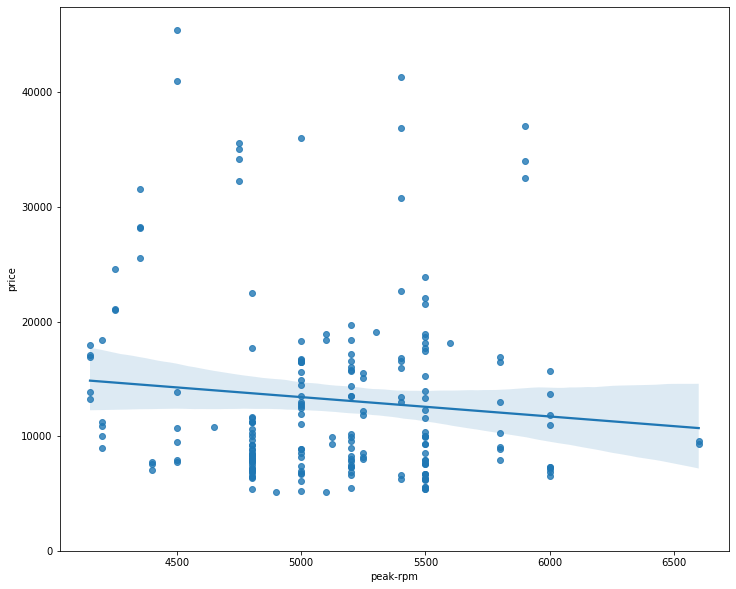

In [17]:
# Plot of 'peak-rpm'
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=dataframe)
plt.ylim(0, )

**Residual Plot**

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

<function matplotlib.pyplot.show(*args, **kw)>

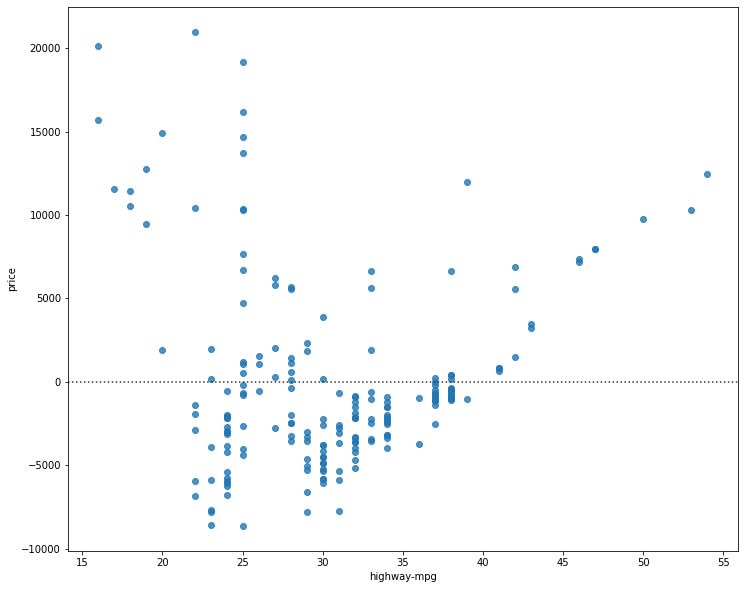

In [18]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=dataframe["highway-mpg"], y=dataframe["price"])
plt.show

**Multiple Linear Regression**

In [19]:
# Making a prediction
Y_hat = lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


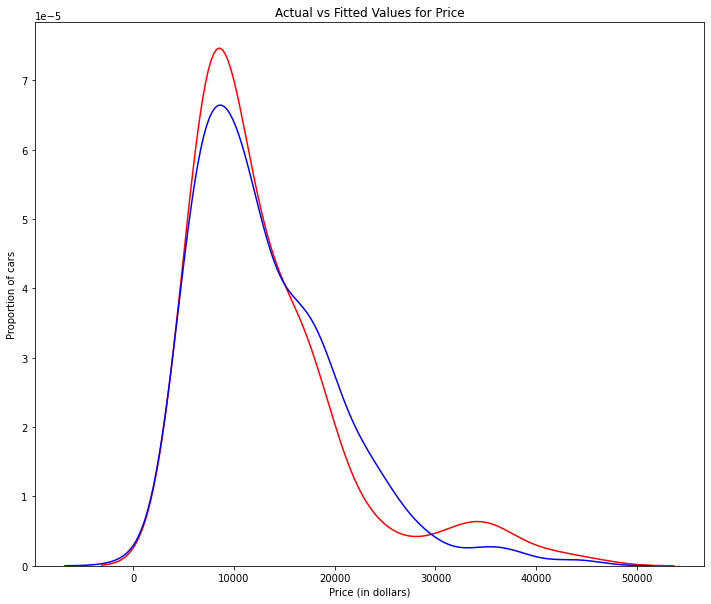

In [20]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(dataframe["price"], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of cars")

plt.show()
plt.close()

### Polynomial Regression and Pipelines

In [21]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [22]:
# Variables
x = dataframe["highway-mpg"]
y = dataframe["price"]

In [23]:
# Fit the polynomial using polyfit
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


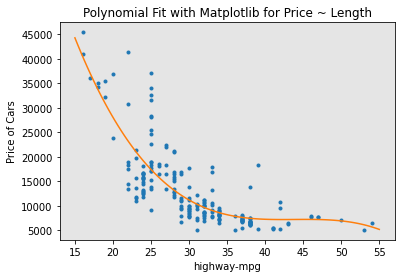

In [24]:
# Plotting the function
PlotPolly(p, x, y, "highway-mpg")

In [25]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

Perform a polynomial transform on multiple features.

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
# Creating a PolynomialFeatures object of degree 2
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [30]:
Z_pr = pr.fit_transform(Z)

In [32]:
# Original data
# 201 samples and 4 features
Z.shape

(201, 4)

In [33]:
# After the transformation
# 201 samples and 15 features
Z_pr.shape

(201, 15)

**Pipeline**

In [26]:
# Importing the libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [34]:
# Create the pipeline
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [35]:
# Input the list as an argument to the pipeline constructor
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [36]:
# Normalize the data, perform a transform and fit the model simultaneously
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [37]:
# Normalize the data, perform a transform and produce a prediction simultaneously
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

### Measures for In-Sample Evaluation